# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Import Packages

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,roc_curve

import warnings
warnings.filterwarnings("ignore")

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [105]:
print("The data represents total 17 marketing campaigns.")

The data represents total 17 marketing campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [106]:
# read data #
bank_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [107]:
# display top rows #
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [108]:
# size of dataset i.e. total samples and features  #
bank_df.shape

(41188, 21)

In [109]:
bank_df.select_dtypes(exclude=['number']).drop('y',axis = 1).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [110]:
bank_df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

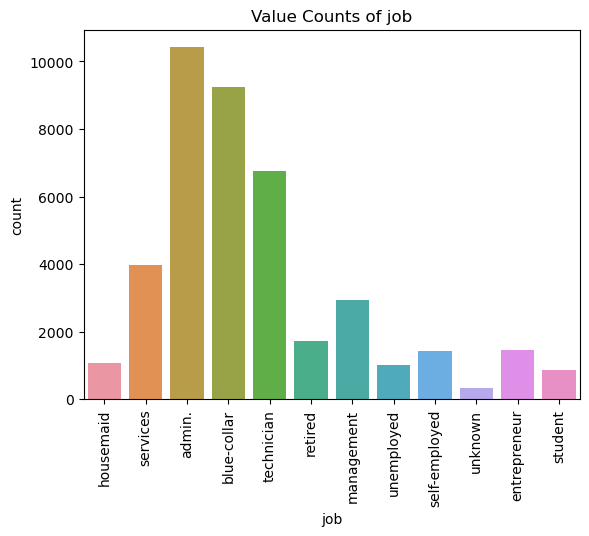

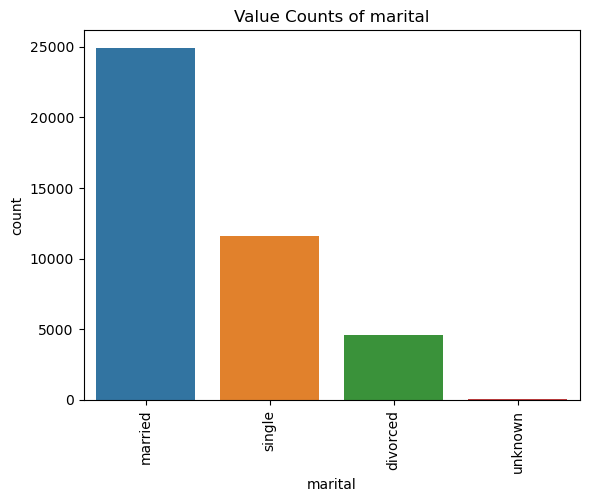

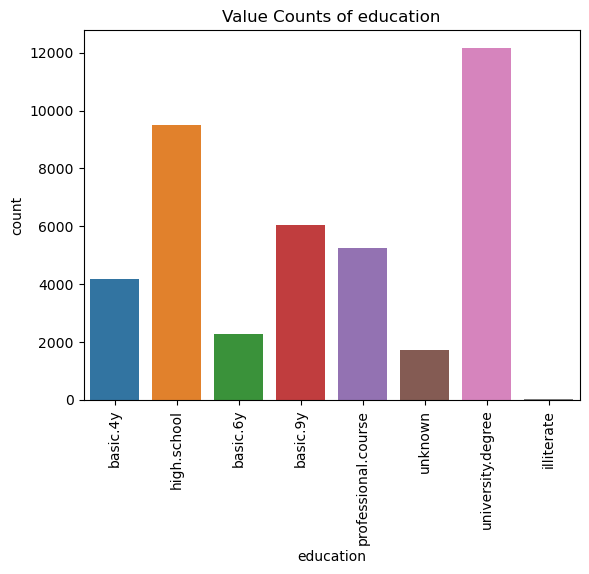

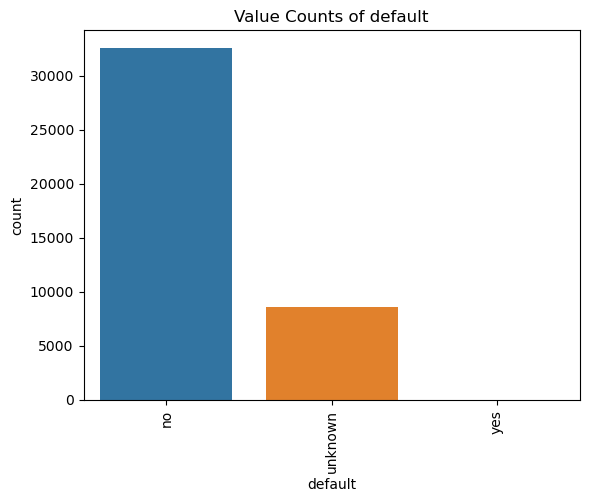

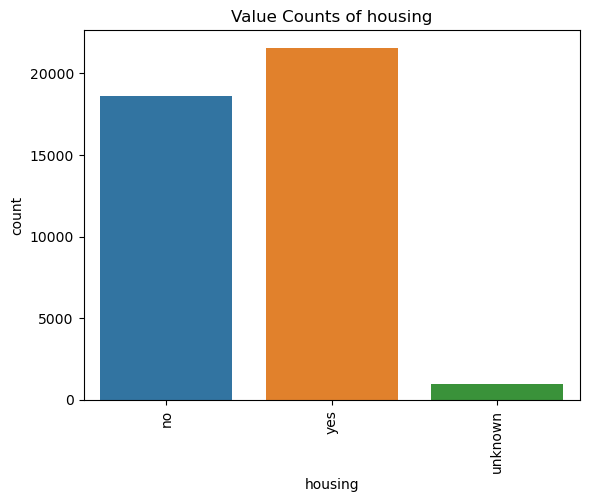

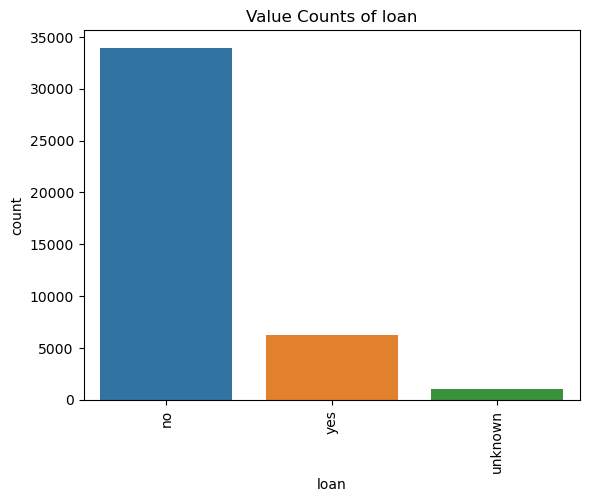

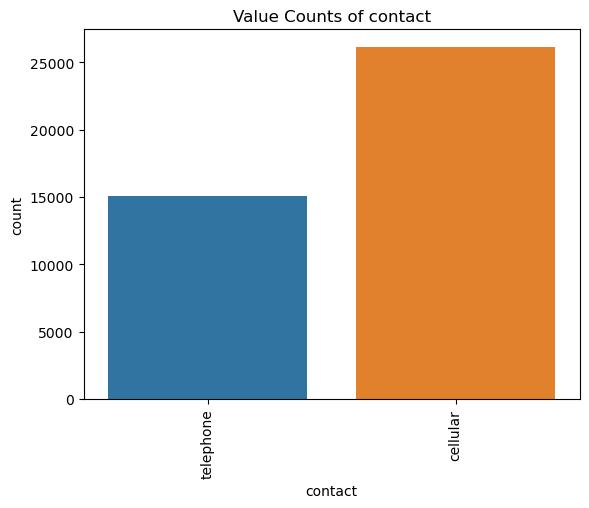

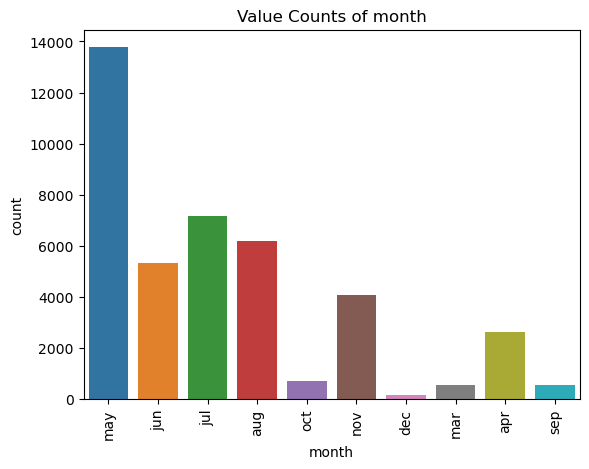

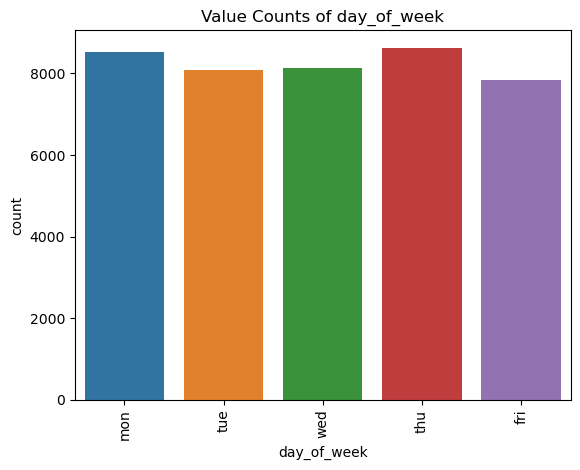

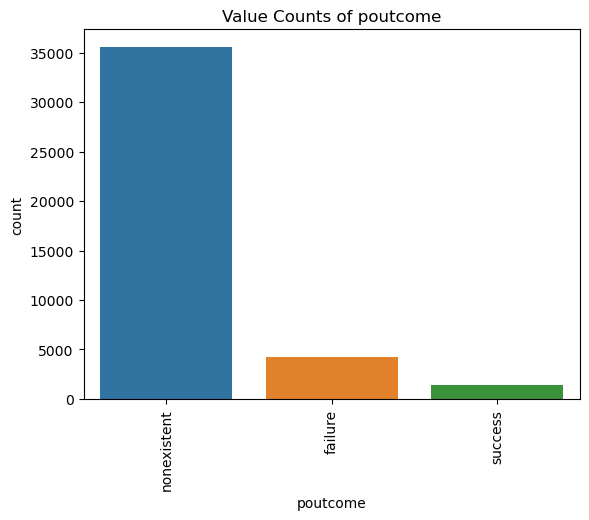

In [111]:
 # examine non-numeric features #
 for column in bank_df.select_dtypes(exclude=['number']).drop('y',axis = 1).columns:
  sns.countplot(x=column, data=bank_df)
  plt.title(f'Value Counts of {column}')
  plt.xticks(rotation=90)
  plt.show()

In [112]:
# check missing values #
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [113]:
# statistics about dataset #
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [114]:
# statistics about non-numerical features #
bank_df.describe(exclude='number').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


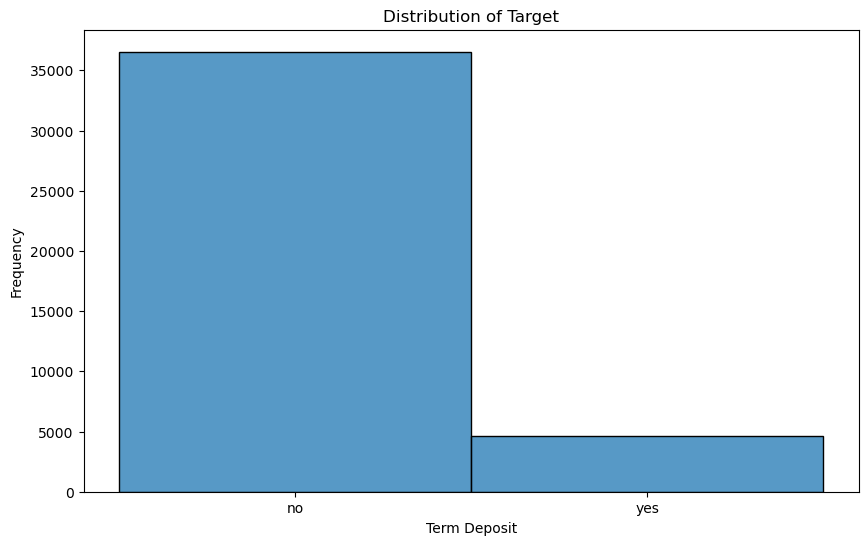

In [115]:
# visualize distribution of target variable #
plt.figure(figsize=(10, 6))
sns.histplot(bank_df['y'])
plt.title('Distribution of Target')
plt.xlabel('Term Deposit')
plt.ylabel('Frequency')
plt.show()

<Axes: >

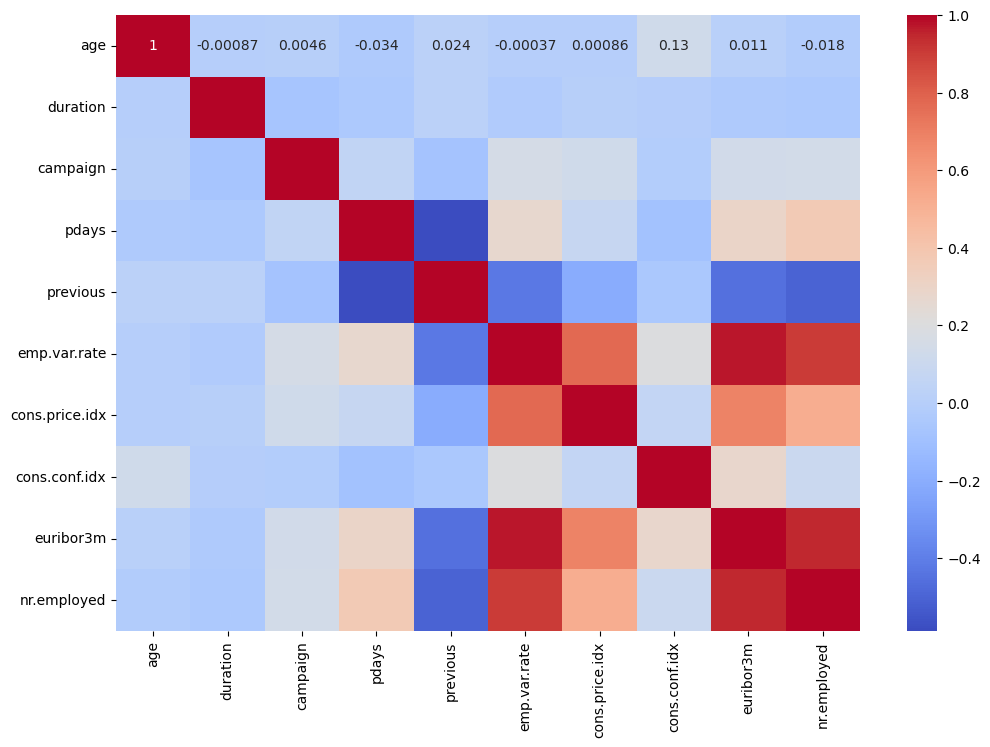

In [116]:
# Visualize correlations between independent variables #
plt.figure(figsize=(12, 8))
correlation_matrix = bank_df.drop('y',axis = 1).select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### **Business Objective**


The objective of this project is to compare different classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) using the bank marketing dataset from the UCI Machine Learning Repository. The goal is to determine the most accurate and reliable model for predicting the success of a marketing campaign for a bank.

The dataset contains information about client attributes, campaign details, and outcome variables related to bank marketing campaigns. By evaluating the performance of different classifiers on this dataset, the objective is to assess their accuracy, precision, recall, and F1-score in predicting whether a client will subscribe to a term deposit or not.

The aim is to identify the classifier that performs best in terms of these metrics, which will provide valuable insights for the bank's marketing campaign.

In [117]:
# dataset information #
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [118]:
# encode and scale data #
encoder = OneHotEncoder()
scaler = StandardScaler()
transformer = make_column_transformer((encoder, bank_df.drop('y',axis = 1).select_dtypes(exclude=['number']).columns), (scaler,  bank_df.drop('y',axis = 1).select_dtypes(include=['number']).columns), remainder=scaler)
encoded_data = transformer.fit_transform(bank_df.drop('y',axis = 1))

In [119]:
# Get the feature names from the transformer #
feature_names = transformer.get_feature_names_out()

# Remove the prefix from the feature names #
feature_names = pd.Series(feature_names).str.replace('onehotencoder__', '').str.replace('standardscaler__', '')

# Convert the feature names to a list #
feature_names = feature_names.tolist()

In [120]:
# prepared scaled and encoded dataframe #
bank_encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
bank_encoded_df['y'] = bank_df['y']
bank_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,no
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,no
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,yes
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,no
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,no
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,yes


In [121]:
bank_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_admin.                     41188 non-null  float64
 1   job_blue-collar                41188 non-null  float64
 2   job_entrepreneur               41188 non-null  float64
 3   job_housemaid                  41188 non-null  float64
 4   job_management                 41188 non-null  float64
 5   job_retired                    41188 non-null  float64
 6   job_self-employed              41188 non-null  float64
 7   job_services                   41188 non-null  float64
 8   job_student                    41188 non-null  float64
 9   job_technician                 41188 non-null  float64
 10  job_unemployed                 41188 non-null  float64
 11  job_unknown                    41188 non-null  float64
 12  marital_divorced               41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [122]:
# split data into 75/25 ratios due to 40K+ sample size #
X = bank_encoded_df.drop('y',axis = 1)
y = bank_encoded_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [123]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [124]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [125]:
bank_encoded_df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [126]:
print(f"The baseline score is {bank_encoded_df['y'].value_counts(normalize=True).max():.2f}")

The baseline score is 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [127]:
# baseline model #
# Start the timer #
start_time = time.time()
base_regression_model = LogisticRegression()
base_regression_model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
base_regression_training_time = end_time - start_time

In [128]:
# make predictions #
y_pred = base_regression_model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [129]:
# Print the evaluation metrics #
print("Logistic Regression Model: [Training Data]")
print(f"Training Time: {base_regression_training_time:.2f} seconds")
print(f"Accuracy: {base_regression_model.score(X_train, y_train):.2F}")

Logistic Regression Model: [Training Data]
Training Time: 0.27 seconds
Accuracy: 0.91


In [130]:
# Calculate evaluation metrics #
base_regression_model_train_accuracy = base_regression_model.score(X_train, y_train)
base_regression_model_accuracy = accuracy_score(y_test, y_pred)
base_regression_model_precision = precision_score(y_test, y_pred, pos_label='yes')
base_regression_model_recall = recall_score(y_test, y_pred, pos_label='yes')
base_regression_model_f1 = f1_score(y_test, y_pred, pos_label='yes')
y_pred_proba = base_regression_model.predict_proba(X_test)[:, 1]
base_regression_model_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [131]:
# Print the evaluation metrics #
print("Logistic Regression Model: [Test Data]")
print(f"Accuracy: {base_regression_model_accuracy:.2F}")
print(f"Precision: {base_regression_model_precision:.2F}")
print(f"Recall:{base_regression_model_recall:.2F}")
print(f"F1 Score: {base_regression_model_f1:.2F}")
print(f"ROC AUC: {base_regression_model_roc_auc:.2F}")

Logistic Regression Model: [Test Data]
Accuracy: 0.91
Precision: 0.67
Recall:0.43
F1 Score: 0.52
ROC AUC: 0.94


In [132]:
# Calculate the classification report #
base_regression_model_classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
base_regression_model_classification_rep_df

,precision,recall,f1-score,support
no,0.931096,0.973863,0.951999,9144.00000
yes,0.673943,0.428448,0.523860,1153.00000
accuracy,0.912790,0.912790,0.912790,0.91279
macro avg,0.802519,0.701155,0.737930,10297.00000
weighted avg,0.902301,0.912790,0.904059,10297.00000


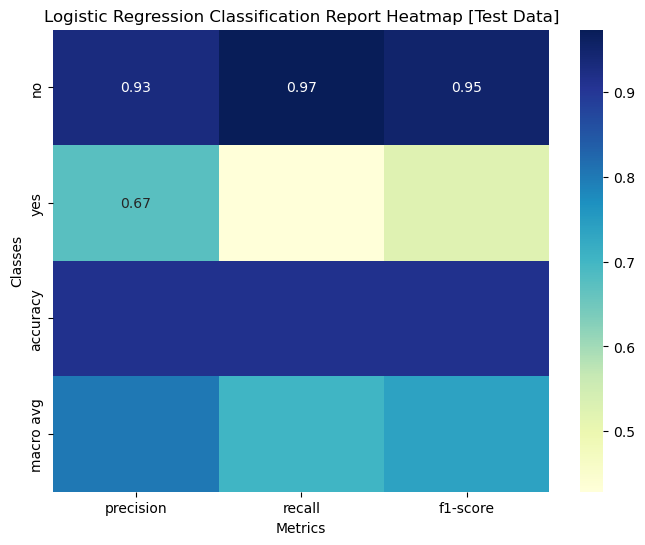

In [133]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(base_regression_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Logistic Regression Classification Report Heatmap [Test Data]')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### KNN

In [134]:
# default KNN model #
# Start the timer #
start_time = time.time()
base_knn_model = KNeighborsClassifier()
base_knn_model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
base_knn_model_training_time = end_time - start_time

In [135]:
# make predictions #
y_pred = base_knn_model.predict(X_test)

In [136]:
# Print the evaluation metrics #
print("KNN Model: [Training Data]")
print(f"Training Time: {base_knn_model_training_time:.2f} seconds")
print(f"Accuracy: {base_knn_model.score(X_train, y_train):.2F}")

KNN Model: [Training Data]
Training Time: 0.03 seconds
Accuracy: 0.93


In [137]:
# Calculate evaluation metrics #
base_knn_model_train_accuracy = base_knn_model.score(X_train, y_train)
base_knn_model_accuracy = accuracy_score(y_test, y_pred)
base_knn_model_precision = precision_score(y_test, y_pred, pos_label='yes')
base_knn_model_recall = recall_score(y_test, y_pred, pos_label='yes')
base_knn_model_f1 = f1_score(y_test, y_pred, pos_label='yes')
y_pred_proba = base_knn_model.predict_proba(X_test)[:, 1]
base_knn_model_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [138]:
# Print the evaluation metrics #
print("KNN Model: [Test Data]")
print(f"Accuracy: {base_knn_model_accuracy:.2F}")
print(f"Precision: {base_knn_model_precision:.2F}")
print(f"Recall:{base_knn_model_recall:.2F}")
print(f"F1 Score: {base_knn_model_f1:.2F}")
print(f"ROC AUC: {base_knn_model_roc_auc:.2F}")

KNN Model: [Test Data]
Accuracy: 0.90
Precision: 0.59
Recall:0.45
F1 Score: 0.51
ROC AUC: 0.87


In [139]:
# Calculate the classification report #
base_knn_model_classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
base_knn_model_classification_rep_df

,precision,recall,f1-score,support
no,0.932308,0.960958,0.946416,9144.00000
yes,0.590596,0.446661,0.508642,1153.00000
accuracy,0.903370,0.903370,0.903370,0.90337
macro avg,0.761452,0.703809,0.727529,10297.00000
weighted avg,0.894045,0.903370,0.897397,10297.00000


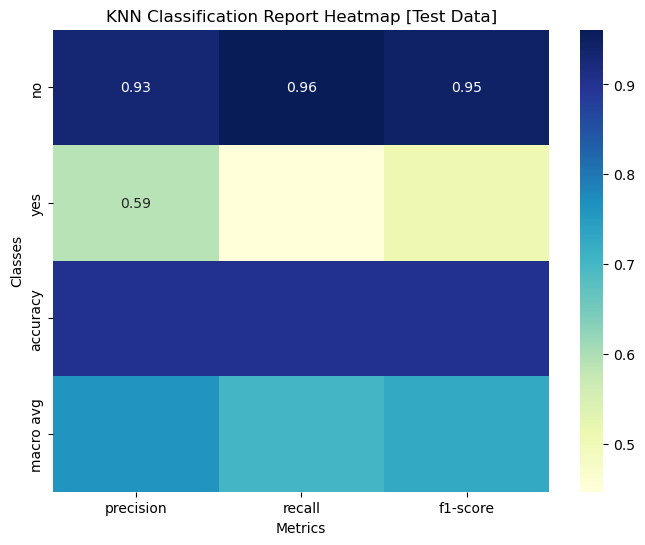

In [140]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(base_knn_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('KNN Classification Report Heatmap [Test Data]')
plt.show()

### Decision Tree

In [141]:
# default Decision Tree model #
# Start the timer #
start_time = time.time()
base_dt_model = DecisionTreeClassifier(random_state=123)
base_dt_model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
base_dt_model_training_time = end_time - start_time

In [142]:
# make predictions #
y_pred = base_dt_model.predict(X_test)

In [143]:
# Print the evaluation metrics #
print("Decion Tree Model: [Training Data]")
print(f"Training Time: {base_dt_model_training_time:.2f} seconds")
print(f"Accuracy: {base_dt_model.score(X_train, y_train):.2F}")

Decion Tree Model: [Training Data]
Training Time: 0.15 seconds
Accuracy: 1.00


In [144]:
# Calculate evaluation metrics #
base_dt_model_train_accuracy = base_dt_model.score(X_train, y_train)
base_dt_model_accuracy = accuracy_score(y_test, y_pred)
base_dt_model_precision = precision_score(y_test, y_pred, pos_label='yes')
base_dt_model_recall = recall_score(y_test, y_pred, pos_label='yes')
base_dt_model_f1 = f1_score(y_test, y_pred, pos_label='yes')
y_pred_proba = base_dt_model.predict_proba(X_test)[:, 1]
base_dt_model_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [145]:
# Print the evaluation metrics #
print("Decision Tree Model: [Test Data]")
print(f"Accuracy: {base_dt_model_accuracy:.2F}")
print(f"Precision: {base_dt_model_precision:.2F}")
print(f"Recall:{base_dt_model_recall:.2F}")
print(f"F1 Score: {base_dt_model_f1:.2F}")
print(f"ROC AUC: {base_dt_model_roc_auc:.2F}")

Decision Tree Model: [Test Data]
Accuracy: 0.89
Precision: 0.49
Recall:0.53
F1 Score: 0.51
ROC AUC: 0.73


In [146]:
# Calculate the classification report #
base_dt_model_classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
base_dt_model_classification_rep_df

,precision,recall,f1-score,support
no,0.940234,0.930774,0.935480,9144.000000
yes,0.491566,0.530789,0.510425,1153.000000
accuracy,0.885986,0.885986,0.885986,0.885986
macro avg,0.715900,0.730782,0.722953,10297.000000
weighted avg,0.889995,0.885986,0.887885,10297.000000


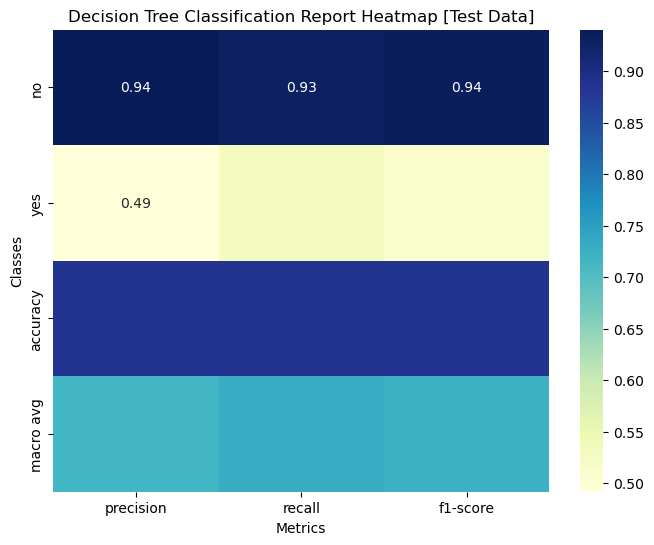

In [147]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(base_dt_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Decision Tree Classification Report Heatmap [Test Data]')
plt.show()

### SVM

In [148]:
# default KNN model #
# Start the timer #
start_time = time.time()
base_svm_model = SVC(probability=True)
base_svm_model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
base_svm_model_training_time = end_time - start_time

In [149]:
# make predictions #
y_pred = base_svm_model.predict(X_test)

In [150]:
# Print the evaluation metrics #
print("SVC Model: [Training Data]")
print(f"Training Time: {base_svm_model_training_time:.2f} seconds")
print(f"Accuracy: {base_svm_model.score(X_train, y_train):.2F}")

SVC Model: [Training Data]
Training Time: 46.66 seconds
Accuracy: 0.92


In [151]:
# Calculate evaluation metrics #
base_svm_model_train_accuracy = base_svm_model.score(X_train, y_train)
base_svm_model_accuracy = accuracy_score(y_test, y_pred)
base_svm_model_precision = precision_score(y_test, y_pred, pos_label='yes')
base_svm_model_recall = recall_score(y_test, y_pred, pos_label='yes')
base_svm_model_f1 = f1_score(y_test, y_pred, pos_label='yes')
y_pred_proba = base_svm_model.predict_proba(X_test)[:, 1]
base_svm_model_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [152]:
# Print the evaluation metrics #
print("SVC Model: [Test Data]")
print(f"Accuracy: {base_svm_model_accuracy:.2F}")
print(f"Precision: {base_svm_model_precision:.2F}")
print(f"Recall:{base_svm_model_recall:.2F}")
print(f"F1 Score: {base_svm_model_f1:.2F}")
print(f"ROC AUC: {base_svm_model_roc_auc:.2F}")

SVC Model: [Test Data]
Accuracy: 0.91
Precision: 0.68
Recall:0.43
F1 Score: 0.53
ROC AUC: 0.91


In [153]:
# Calculate the classification report #
base_svm_model_classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
base_svm_model_classification_rep_df

,precision,recall,f1-score,support
no,0.931604,0.974191,0.952422,9144.000000
yes,0.678912,0.432784,0.528602,1153.000000
accuracy,0.913567,0.913567,0.913567,0.913567
macro avg,0.805258,0.703487,0.740512,10297.000000
weighted avg,0.903309,0.913567,0.904965,10297.000000


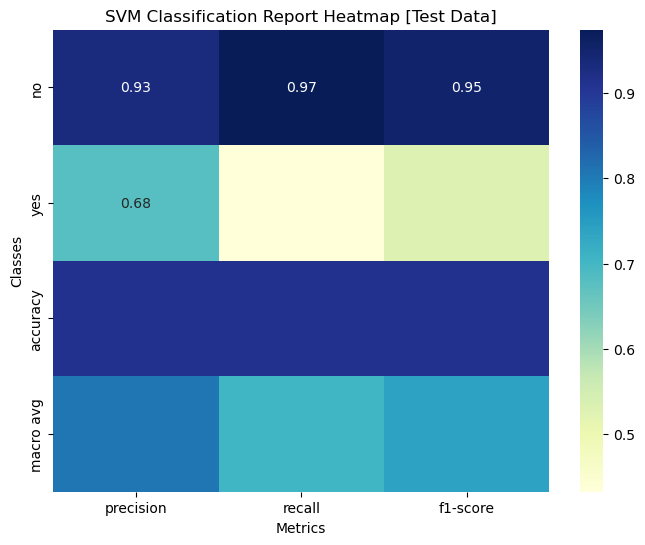

In [154]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(base_svm_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('SVM Classification Report Heatmap [Test Data]')
plt.show()

### Model comparision

In [155]:
# prepare matrix score across models #
base_model_result_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'Train Time': [base_regression_training_time, base_knn_model_training_time, base_dt_model_training_time, base_svm_model_training_time], # Keep these values as numeric
           'Train Accuracy': [base_regression_model_train_accuracy, base_knn_model_train_accuracy, base_dt_model_train_accuracy, base_svm_model_train_accuracy], # Keep these values as numeric
           'Test Accuracy': [base_regression_model_accuracy, base_knn_model_accuracy, base_dt_model_accuracy, base_dt_model_accuracy]} # Keep these values as numeric
results_df = pd.DataFrame(base_model_result_dict).set_index('Model')

# Round numeric values to two decimal places
results_df = results_df.round(2)

results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.27,0.91,0.91
KNN,0.03,0.93,0.90
Decision Tree,0.15,1.00,0.89
SVC,46.66,0.92,0.89


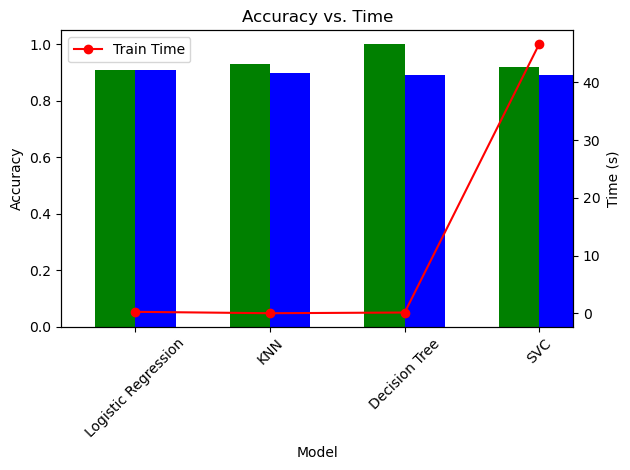

In [156]:
# Plot the DataFrame #
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

results_df['Test Accuracy'].plot(kind='bar', color='blue', ax=ax1, position=0, width=0.3)
results_df['Train Accuracy'].plot(kind='bar', color='green', ax=ax1, position=1, width=0.3)
results_df['Train Time'].plot(kind='line', color='red', marker='o', ax=ax2)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Time (s)')

ax1.set_xlabel('Model')
ax1.set_xticklabels(results_df.index, rotation=45)

plt.title('Accuracy vs. Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Evaluate : Categorical feature vs target Variable : Is it required?

In [157]:
bank_df.groupby(['marital', 'y']).size().unstack()

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [158]:
bank_df.groupby(['education', 'y']).size().unstack()

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [159]:
bank_df.groupby(['default', 'y']).size().unstack()

y,no,yes
default,,
no,28391.0,4197.0
unknown,8154.0,443.0
yes,3.0,NaN


In [160]:
bank_df.groupby(['housing', 'y']).size().unstack()

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


In [161]:
bank_df.groupby(['loan', 'y']).size().unstack()

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [162]:
bank_df.groupby(['contact', 'y']).size().unstack()

y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [163]:
bank_df.groupby(['month', 'y']).size().unstack()

y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [164]:
bank_df.groupby(['day_of_week', 'y']).size().unstack()

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [165]:
bank_df.groupby(['poutcome', 'y']).size().unstack()

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


#### Considering that the success range is similar for each day of the week, I am considering removing the **'day_of_week'** feature from the dataset and then splitting the data again

In [166]:
# drop day_of_week feature #
columns_to_drop = [col for col in bank_encoded_df.columns if col.startswith('day_of_week')]
bank_encoded_revised_df = bank_encoded_df.drop(columns=columns_to_drop)

In [167]:
bank_encoded_df.shape, bank_encoded_revised_df.shape

((41188, 64), (41188, 59))

In [168]:
# split data into 75/25 ratios due to 40K+ sample size #
X2 = bank_encoded_revised_df.drop('y',axis = 1)
y2 = bank_encoded_revised_df['y']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42, shuffle=True)

###Logistic Regression - GridSearchCV

In [169]:
# optimized model using GridSearchCV #
# Start the timer #
start_time = time.time()
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

regression_model = LogisticRegression()
optimized_regression_model = GridSearchCV(regression_model, param_grid, cv=5).fit(X2_train, y2_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
optimized_regression_training_time = end_time - start_time

In [170]:
# make predictions #
y2_pred = optimized_regression_model.predict(X2_test)

In [171]:
# Print the evaluation metrics #
print("Logistic Regression Model: [Training Data]")
print(f"Training Time: {optimized_regression_training_time:.2f} seconds")
print(f"Accuracy: {optimized_regression_model.score(X2_train, y2_train):.2F}")

Logistic Regression Model: [Training Data]
Training Time: 4.32 seconds
Accuracy: 0.91


In [172]:
# Calculate evaluation metrics #
optimized_regression_model_train_accuracy = optimized_regression_model.score(X2_train, y2_train)
optimized_regression_model_accuracy = accuracy_score(y2_test, y2_pred)
optimized_regression_model_precision = precision_score(y2_test, y2_pred, pos_label='yes')
optimized_regression_model_recall = recall_score(y2_test, y2_pred, pos_label='yes')
optimized_regression_model_f1 = f1_score(y2_test, y2_pred, pos_label='yes')
y2_pred_proba = optimized_regression_model.predict_proba(X2_test)[:, 1]
optimized_regression_model_roc_auc = roc_auc_score(y2_test, y2_pred_proba)

In [173]:
# Print the evaluation metrics #
print("Logistic Regression Model: [Test Data]")
print(f"Accuracy: {optimized_regression_model_accuracy:.2F}")
print(f"Precision: {optimized_regression_model_precision:.2F}")
print(f"Recall:{optimized_regression_model_recall:.2F}")
print(f"F1 Score: {optimized_regression_model_f1:.2F}")
print(f"ROC AUC: {optimized_regression_model_roc_auc:.2F}")

Logistic Regression Model: [Test Data]
Accuracy: 0.91
Precision: 0.68
Recall:0.42
F1 Score: 0.52
ROC AUC: 0.94


In [174]:
# Calculate the classification report #
optimized_regression_model_classification_rep_df = pd.DataFrame(classification_report(y2_test, y2_pred, output_dict=True)).transpose()
optimized_regression_model_classification_rep_df

,precision,recall,f1-score,support
no,0.930354,0.974409,0.951872,9144.000000
yes,0.675000,0.421509,0.518954,1153.000000
accuracy,0.912499,0.912499,0.912499,0.912499
macro avg,0.802677,0.697959,0.735413,10297.000000
weighted avg,0.901761,0.912499,0.903396,10297.000000


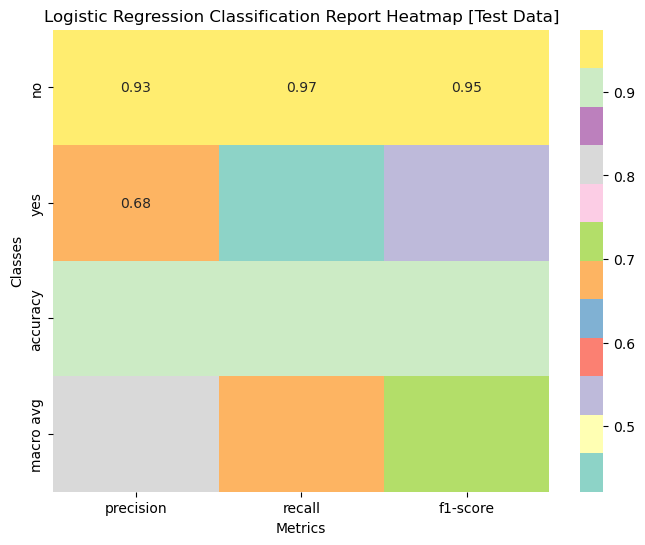

In [175]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_regression_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='Set3')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Logistic Regression Classification Report Heatmap [Test Data]')
plt.show()

###KNN - GridSearchCV

In [176]:
# optimized model using GridSearchCV #
# Start the timer #
start_time = time.time()
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

knn_model = KNeighborsClassifier()
optimized_knn_model = GridSearchCV(knn_model, param_grid, cv=5).fit(X2_train, y2_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
optimized_knn_training_time = end_time - start_time

In [177]:
# make predictions #
y2_pred = optimized_knn_model.predict(X2_test)

In [178]:
# Print the evaluation metrics #
print("KNN Model: [Training Data]")
print(f"Training Time: {optimized_knn_training_time:.2f} seconds")
print(f"Accuracy: {optimized_knn_model.score(X2_train, y2_train):.2F}")

KNN Model: [Training Data]
Training Time: 5.43 seconds
Accuracy: 0.92


In [179]:
# Calculate evaluation metrics #
optimized_knn_model_train_accuracy = optimized_knn_model.score(X2_train, y2_train)
optimized_knn_model_accuracy = accuracy_score(y2_test, y2_pred)
optimized_knn_model_precision = precision_score(y2_test, y2_pred, pos_label='yes')
optimized_knn_model_recall = recall_score(y2_test, y2_pred, pos_label='yes')
optimized_knn_model_f1 = f1_score(y2_test, y2_pred, pos_label='yes')
y2_pred_proba = optimized_knn_model.predict_proba(X2_test)[:, 1]
optimized_knn_model_roc_auc = roc_auc_score(y2_test, y2_pred_proba)

In [180]:
# Print the evaluation metrics #
print("KNN Model: [Test Data]")
print(f"Accuracy: {optimized_knn_model_accuracy:.2F}")
print(f"Precision: {optimized_knn_model_precision:.2F}")
print(f"Recall:{optimized_knn_model_recall:.2F}")
print(f"F1 Score: {optimized_knn_model_f1:.2F}")
print(f"ROC AUC: {optimized_knn_model_roc_auc:.2F}")

KNN Model: [Test Data]
Accuracy: 0.90
Precision: 0.60
Recall:0.43
F1 Score: 0.50
ROC AUC: 0.89


In [181]:
# Calculate the classification report #
optimized_knn_model_classification_rep_df = pd.DataFrame(classification_report(y2_test, y2_pred, output_dict=True)).transpose()
optimized_knn_model_classification_rep_df

,precision,recall,f1-score,support
no,0.930419,0.963692,0.946763,9144.000000
yes,0.598063,0.428448,0.499242,1153.000000
accuracy,0.903758,0.903758,0.903758,0.903758
macro avg,0.764241,0.696070,0.723003,10297.000000
weighted avg,0.893204,0.903758,0.896652,10297.000000


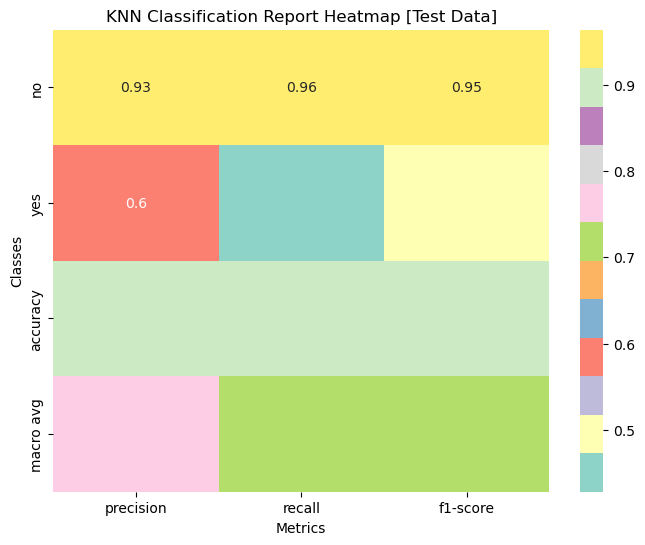

In [182]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_knn_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='Set3')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('KNN Classification Report Heatmap [Test Data]')
plt.show()

### Decision Tree - GridSearchCV

In [183]:
# optimized model using GridSearchCV #
# Start the timer #
start_time = time.time()
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

dt_model = DecisionTreeClassifier(random_state=123)
optimized_dt_model = GridSearchCV(dt_model, param_grid, cv=5).fit(X2_train, y2_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
optimized_dt_training_time = end_time - start_time

In [184]:
# make predictions #
y2_pred = optimized_dt_model.predict(X2_test)

In [185]:
# Print the evaluation metrics #
print("Decision Tree Model: [Training Data]")
print(f"Training Time: {optimized_dt_training_time:.2f} seconds")
print(f"Accuracy: {optimized_dt_model.score(X2_train, y2_train):.2F}")

Decision Tree Model: [Training Data]
Training Time: 2.68 seconds
Accuracy: 0.92


In [186]:
# Calculate evaluation metrics #
optimized_dt_model_train_accuracy = optimized_dt_model.score(X2_train, y2_train)
optimized_dt_model_accuracy = accuracy_score(y2_test, y2_pred)
optimized_dt_model_precision = precision_score(y2_test, y2_pred, pos_label='yes')
optimized_dt_model_recall = recall_score(y2_test, y2_pred, pos_label='yes')
optimized_dt_model_f1 = f1_score(y2_test, y2_pred, pos_label='yes')
y2_pred_proba = optimized_dt_model.predict_proba(X2_test)[:, 1]
optimized_dt_model_roc_auc = roc_auc_score(y2_test, y2_pred_proba)

In [187]:
# Print the evaluation metrics #
print("Decision Tree Model: [Test Data]")
print(f"Accuracy: {optimized_dt_model_accuracy:.2F}")
print(f"Precision: {optimized_dt_model_precision:.2F}")
print(f"Recall:{optimized_dt_model_recall:.2F}")
print(f"F1 Score: {optimized_dt_model_f1:.2F}")
print(f"ROC AUC: {optimized_dt_model_roc_auc:.2F}")

Decision Tree Model: [Test Data]
Accuracy: 0.92
Precision: 0.65
Recall:0.53
F1 Score: 0.59
ROC AUC: 0.92


In [188]:
# Calculate the classification report #
optimized_dt_model_classification_rep_df = pd.DataFrame(classification_report(y2_test, y2_pred, output_dict=True)).transpose()
optimized_dt_model_classification_rep_df

,precision,recall,f1-score,support
no,0.942113,0.964676,0.953261,9144.000000
yes,0.654176,0.529922,0.585529,1153.000000
accuracy,0.915995,0.915995,0.915995,0.915995
macro avg,0.798144,0.747299,0.769395,10297.000000
weighted avg,0.909871,0.915995,0.912084,10297.000000


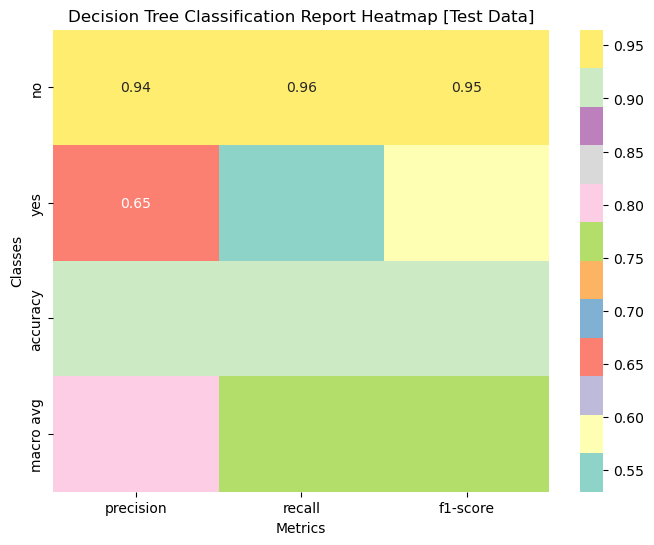

In [189]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_dt_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='Set3')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Decision Tree Classification Report Heatmap [Test Data]')
plt.show()

### SVM - GridSearchCV

In [190]:
# optimized model using GridSearchCV #
# Start the timer #
start_time = time.time()
param_grid = {'kernel': ['linear', 'rbf']}

svc_model = SVC(probability=True)
optimized_svc_model = GridSearchCV(svc_model, param_grid).fit(X2_train, y2_train)

# Stop the timer
end_time = time.time()
# Calculate the training time
optimized_svc_training_time = end_time - start_time

In [191]:
# make predictions #
y2_pred = optimized_svc_model.predict(X2_test)

In [192]:
# Print the evaluation metrics #
print("KNN Regression Model: [Training Data]")
print(f"Training Time: {optimized_svc_training_time:.2f} seconds")
print(f"Accuracy: {optimized_svc_model.score(X2_train, y2_train):.2F}")

KNN Regression Model: [Training Data]
Training Time: 335.38 seconds
Accuracy: 0.92


In [193]:
# Calculate evaluation metrics #
optimized_svc_model_train_accuracy = optimized_svc_model.score(X2_train, y2_train)
optimized_svc_model_accuracy = accuracy_score(y2_test, y2_pred)
optimized_svc_model_precision = precision_score(y2_test, y2_pred, pos_label='yes')
optimized_svc_model_recall = recall_score(y2_test, y2_pred, pos_label='yes')
optimized_svc_model_f1 = f1_score(y2_test, y2_pred, pos_label='yes')
y2_pred_proba = optimized_svc_model.predict_proba(X2_test)[:, 1]
optimized_svc_model_roc_auc = roc_auc_score(y2_test, y2_pred_proba)

In [194]:
# Print the evaluation metrics #
print("SVM Model: [Test Data]")
print(f"Accuracy: {optimized_svc_model_accuracy:.2F}")
print(f"Precision: {optimized_svc_model_precision:.2F}")
print(f"Recall:{optimized_svc_model_recall:.2F}")
print(f"F1 Score: {optimized_svc_model_f1:.2F}")
print(f"ROC AUC: {optimized_svc_model_roc_auc:.2F}")

SVM Model: [Test Data]
Accuracy: 0.91
Precision: 0.67
Recall:0.42
F1 Score: 0.51
ROC AUC: 0.91


In [195]:
# Calculate the classification report #
optimized_svc_model_classification_rep_df = pd.DataFrame(classification_report(y2_test, y2_pred, output_dict=True)).transpose()
optimized_svc_model_classification_rep_df

,precision,recall,f1-score,support
no,0.929944,0.974081,0.951501,9144.000000
yes,0.670376,0.418040,0.514957,1153.000000
accuracy,0.911819,0.911819,0.911819,0.911819
macro avg,0.800160,0.696061,0.733229,10297.000000
weighted avg,0.900879,0.911819,0.902619,10297.000000


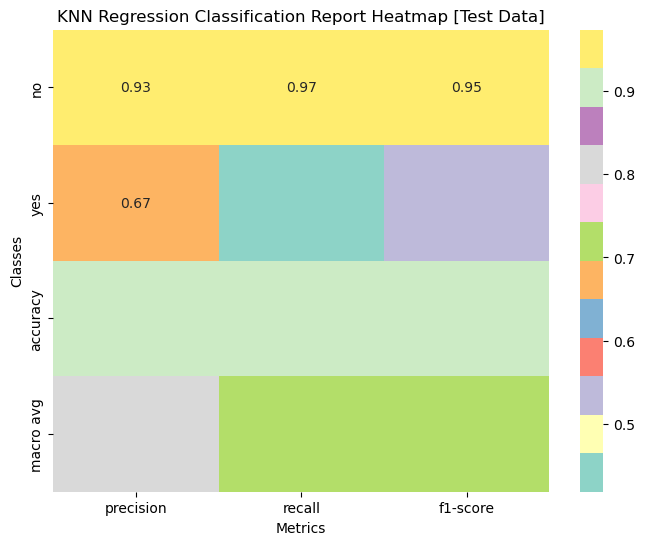

In [196]:
# Plot the heatmap #
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_svc_model_classification_rep_df.iloc[:-1, :-1], annot=True, cmap='Set3')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('KNN Regression Classification Report Heatmap [Test Data]')
plt.show()

# Evaluation

In order to determine the most suitable model, we will perform the following steps:

*   Model Comparison i.e. Accuracy (Test/Train), Fit Time etc.
*   Visualize Accuracy vs Time
*   Best Params
*   Feature Importance / Coefficient
*   ROC Curve
*   Visualize Classification Report i.e. Accuracy, Precision, Recall etc.
*   Visualize Confusion Matrix









### Model comparision

In [197]:
# prepare matrix score across models #
optimized_model_result_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'Train Time': [optimized_regression_training_time,optimized_knn_training_time, optimized_dt_training_time, optimized_svc_training_time], # Keep these values as numeric
           'Train Accuracy': [optimized_regression_model_train_accuracy, optimized_knn_model_train_accuracy, optimized_dt_model_train_accuracy, optimized_svc_model_train_accuracy], # Keep these values as numeric
           'Test Accuracy': [optimized_regression_model_accuracy, optimized_knn_model_accuracy, optimized_dt_model_accuracy, optimized_svc_model_accuracy]} # Keep these values as numeric
results2_df = pd.DataFrame(optimized_model_result_dict).set_index('Model')

# Round numeric values to two decimal places
results2_df = results2_df.round(2)

results2_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,4.32,0.91,0.91
KNN,5.43,0.92,0.90
Decision Tree,2.68,0.92,0.92
SVC,335.38,0.92,0.91


### Accuracy vs Time

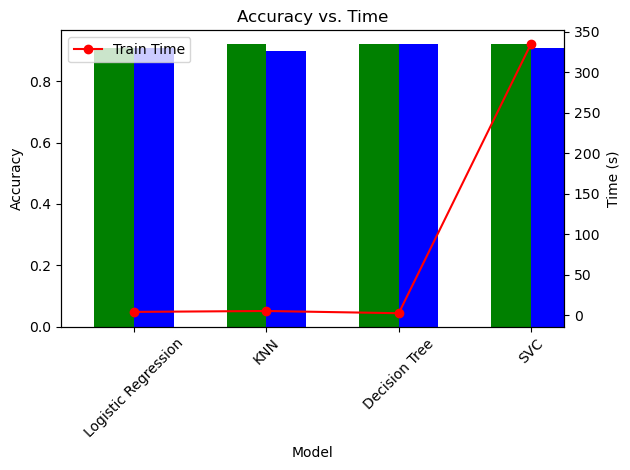

In [198]:
# Plot the DataFrame #
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

results2_df['Test Accuracy'].plot(kind='bar', color='blue', ax=ax1, position=0, width=0.3)
results2_df['Train Accuracy'].plot(kind='bar', color='green', ax=ax1, position=1, width=0.3)
results2_df['Train Time'].plot(kind='line', color='red', marker='o', ax=ax2)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Time (s)')

ax1.set_xlabel('Model')
ax1.set_xticklabels(results2_df.index, rotation=45)

plt.title('Accuracy vs. Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Best Params

In [199]:
print(f" Best Params for Decision Tree Model : {optimized_dt_model.best_params_}")
print(f" Best Params for Logistic Regression Model : {optimized_regression_model.best_params_}")
print(f" Best Params for KNN Model : {optimized_knn_model.best_params_}")
print(f" Best Params for SVM Model : {optimized_svc_model.best_params_}")

 Best Params for Decision Tree Model : {'max_depth': 5, 'min_samples_split': 5}
 Best Params for Logistic Regression Model : {'C': 0.1, 'penalty': 'l2'}
 Best Params for KNN Model : {'n_neighbors': 7, 'weights': 'uniform'}
 Best Params for SVM Model : {'kernel': 'rbf'}


### Feature Importance / Coefficient for Top Performing Model(s)
*   Decision Tree
*   Logistic Regression




In [200]:
# extract feature importances #
dt_feature_importances = optimized_dt_model.best_estimator_.feature_importances_
dt_feature_names = X2_train.columns
dt_feature_importance_df = pd.DataFrame({'Feature': dt_feature_names,'Importance': dt_feature_importances})
dt_feature_importance_df[dt_feature_importance_df['Importance'] > 0].sort_values(by='Importance', ascending=False)

,Feature,Importance
49,duration,0.494090
57,nr.employed,0.362107
56,euribor3m,0.041108
51,pdays,0.040014
55,cons.conf.idx,0.034805
43,month_oct,0.014940
54,cons.price.idx,0.007756
50,campaign,0.003259
33,contact_cellular,0.001921


In [201]:
# extract feature importances #
regression_feature_importances = optimized_regression_model.best_estimator_.coef_[0]
regression_feature_names = X2_train.columns
regression_feature_importance_df = pd.DataFrame({'Feature': regression_feature_names,'coef': regression_feature_importances})
regression_feature_importance_df[regression_feature_importance_df['coef'] > 0].sort_values(by='coef', ascending=False)

,Feature,coef
40,month_mar,1.317280
49,duration,1.184092
54,cons.price.idx,0.601333
56,euribor3m,0.356570
36,month_aug,0.339900
47,poutcome_success,0.297982
5,job_retired,0.270981
33,contact_cellular,0.240317
8,job_student,0.199593
24,default_no,0.141038


### ROC Curve for Top Performing Model(s)
*   Decision Tree
*   Logistic Regression

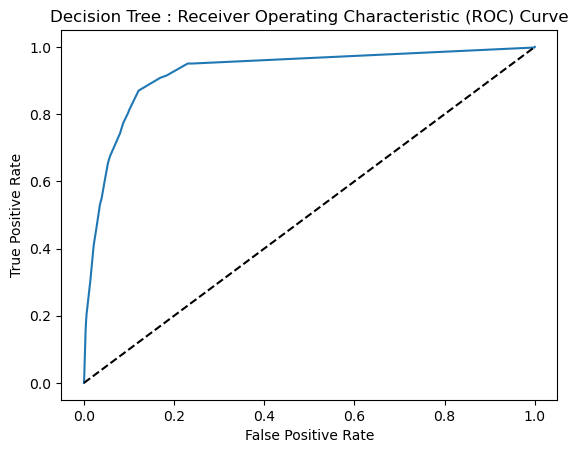

In [202]:
# decision tree #
y_pred_prob = optimized_dt_model.predict_proba(X2_test)[:, 1]

# Map 'no' and 'yes' to 0 and 1 for ROC curve calculation #
y2_test_numeric = y2_test.map({'no': 0, 'yes': 1})

# Compute the false positive rate, true positive rate, and thresholds #
fpr, tpr, thresholds = roc_curve(y2_test_numeric, y_pred_prob)

# Plot the ROC curve #
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree : Receiver Operating Characteristic (ROC) Curve')
plt.show()

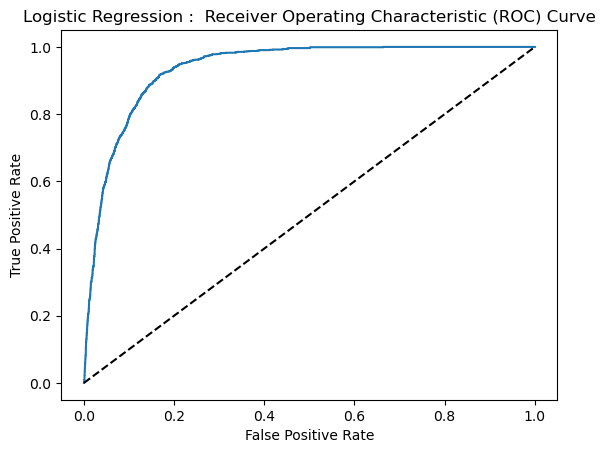

In [203]:
# logistic regression #
y_pred_prob = optimized_regression_model.predict_proba(X2_test)[:, 1]

# Map 'no' and 'yes' to 0 and 1 for ROC curve calculation
y2_test_numeric = y2_test.map({'no': 0, 'yes': 1})

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y2_test_numeric, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression :  Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Classification Report

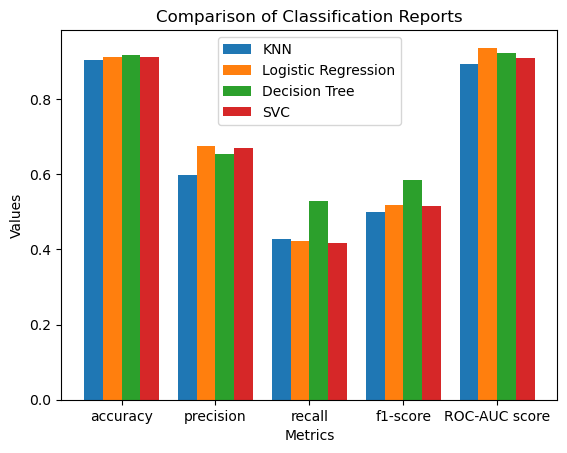

In [204]:
# extract evaluation metrics values #
metrics = ['accuracy','precision', 'recall', 'f1-score', 'ROC-AUC score']
logistic_regression_values = [optimized_regression_model_accuracy, optimized_regression_model_precision, optimized_regression_model_recall, optimized_regression_model_f1, optimized_regression_model_roc_auc]
knn_values = [optimized_knn_model_accuracy, optimized_knn_model_precision, optimized_knn_model_recall, optimized_knn_model_f1, optimized_knn_model_roc_auc]
decision_tree_values = [optimized_dt_model_accuracy, optimized_dt_model_precision, optimized_dt_model_recall, optimized_dt_model_f1, optimized_dt_model_roc_auc]
svc_values = [optimized_svc_model_accuracy, optimized_svc_model_precision, optimized_svc_model_recall, optimized_svc_model_f1, optimized_svc_model_roc_auc]

# Set the x-axis positions #
x = range(len(metrics))

# grouped bar chart #
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar([i - width*1.5 for i in x], knn_values, width, label='KNN')
rects2 = ax.bar([i - width/2 for i in x], logistic_regression_values, width, label='Logistic Regression')
rects3 = ax.bar([i + width/2 for i in x], decision_tree_values, width, label='Decision Tree')
rects4 = ax.bar([i + width*1.5 for i in x], svc_values, width, label='SVC')

# labels and title #
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Classification Reports')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# show the chart #
plt.show()

### Confusion matrix

In [205]:
# calculate confusion matrix #
cm_lr = confusion_matrix(y2_test, optimized_regression_model.predict(X2_test))
cm_knn = confusion_matrix(y2_test, optimized_knn_model.predict(X2_test))
cm_dt = confusion_matrix(y2_test, optimized_dt_model.predict(X2_test))
cm_svc = confusion_matrix(y2_test, optimized_svc_model.predict(X2_test))

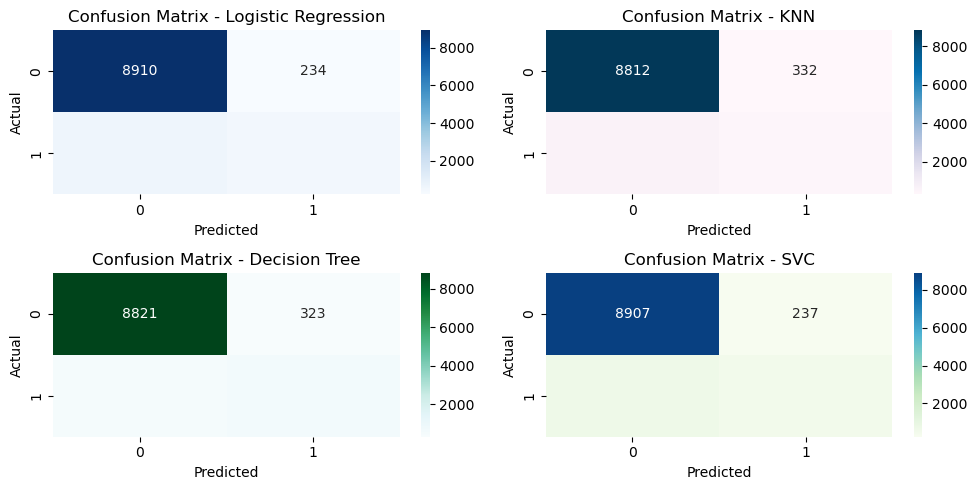

In [206]:
# plot the confusion matrix #
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', ax=axes[0,0])
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')
axes[0,0].set_title('Confusion Matrix - Logistic Regression')

sns.heatmap(cm_knn, annot=True, cmap='PuBu', fmt='d', ax=axes[0,1])
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')
axes[0,1].set_title('Confusion Matrix - KNN')

sns.heatmap(cm_dt, annot=True, cmap='BuGn', fmt='d', ax=axes[1,0])
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')
axes[1,0].set_title('Confusion Matrix - Decision Tree')

sns.heatmap(cm_svc, annot=True, cmap='GnBu', fmt='d', ax=axes[1,1])
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')
axes[1,1].set_title('Confusion Matrix - SVC')

# Adjust the spacing between the subplots
plt.tight_layout()

# show the plot#
plt.show()


### Deployment

*   Save the trained model to a file for future use.
*   Load the saved model and use it to make predictions on new data.

# Key Highlights

*  Decision Tree model performs the best in terms of accuracy and training time (8 seconds).
*  Decision Tree model has the best accuracy (0.92), recall, and F1-Score metrics among all four models.
*  Logistic Regression model has the best precision and ROC-AUC Curve metrics among all four models.
*  SVM model (SVC classifier) has the highest training time (1000+ seconds) and is computationally expensive.
*  Decision Tree : Optimized parameter model has the 0.02 more accuracy compare to default parameter model.
*  Bank Marketing dataset is impbalanced because distribution is not similar within dataset.
*  The highest positive correlation between numerical independent variables is between "emp.var.rate" and "euribor3m" with a value of 0.97.
*  The highest negative correlation between numerical independent variables is between "pdays" and "previous" with a value of -0.59.
*  Decision Tree model predicted the highest True Positives, while SVM (SVC Classifier) predicted the highest True Negatives, followed by the Logistic Regression model on the Test Data.
*  The "Day_of_Week" feature has a similar success rate among all categorical values, so it is not an important feature for the given model dataset.
*  The "nr.employed" & "euribor3m" are higher importance features since they have higher influence towards model predictions.
*  The "month", "cons.price.idx" and "duration" features have higher coefficient and they contribute higher towards predicting the target variable.
*   Overall, the **Decision Tree** model is the best performing model among all four models followed by **Logistic Regression** model.


# Next steps and Recommendations

*  Evaluate and identify non-important categorical features in a group (with other feature variable) rather than single to determine whether there exists combination of categorical features which can be discarded.
*  Continue to add samples from new marketing campaign and evaluate the different classifier models.  
*  Imbalanced dataset: Since the bank marketing dataset is imbalanced, consider using techniques such as resampling, SMOTE, or cost-sensitive learning to address the class imbalance and improve model performance.
*  Feature importance: Focus on the "nr.employed", "euribor3m", "month", "cons.price.idx", and "duration" features, as they have higher coefficients or importance towards predicting the target variable. Consider further analyzing these features and their relationships with the target variable to gain deeper insights.
* Training time and computational expense: Given that the SVM model (SVC classifier) has the highest training time and is computationally expensive, consider optimizing the model or exploring alternative models that can provide similar performance with lower training time.
*  Performance metrics: While the Decision Tree model performs the best in terms of accuracy, recall, and F1-Score, and the Logistic Regression model has the best precision and ROC-AUC Curve metrics, it is important to consider the specific requirements of the problem at hand. Evaluate the trade-offs between different metrics and select the model that aligns best with the desired outcome.
*  Correlation analysis: Take note of the highest positive correlation between "emp.var.rate" and "euribor3m" and the highest negative correlation between "pdays" and "previous". These insights can help in understanding the relationships between variables and potentially identifying multicollinearity issues.  
* Overall, continue to refine and optimize the Decision Tree model and consider the recommendations mentioned above to further enhance model performance and interpretability.  








